In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob

In [6]:
train_origin_path = '/opt/ml/input/data/train/images'
train_image_path = '/opt/ml/input/data/train/_all'
train_path = '/opt/ml/input/data/train'
eval_image_path = '/opt/ml/input/'

# 1:1 Fixed CutMix

In [7]:
train_images = glob(os.path.join(train_image_path, '*.jpg'))
train_size = len(train_images)

train_origin_folders = glob(os.path.join(train_origin_path, '*'))

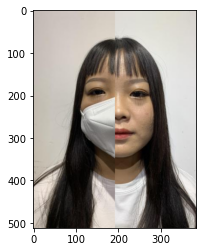

In [72]:
random_folder = np.random.choice(train_origin_folders)

incorrect = glob(os.path.join(random_folder, 'incorrect*'))[0]
masks = sorted(glob(os.path.join(random_folder, 'mask*')))
normal = glob(os.path.join(random_folder, 'normal*'))[0]

mask1 = masks[0]

mask1 = cv2.imread(mask1)
mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB)
mask1 = mask1 / 255.

normal = cv2.imread(normal)
normal = cv2.cvtColor(normal, cv2.COLOR_BGR2RGB)
normal = normal / 255.

new_image = np.zeros_like(normal, dtype=np.float32)
new_image[:, :192] = mask1[:, :192]
new_image[:, 192:] = normal[:, 192:]
    
plt.imshow(new_image)
plt.show()

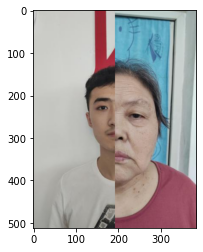

In [21]:
folder1 = np.random.choice(train_origin_folders)
folder2 = np.random.choice(train_origin_folders)

normal1 = glob(os.path.join(folder1, 'normal*'))[0]
normal2 = glob(os.path.join(folder2, 'normal*'))[0]

normal1 = cv2.imread(normal1)
normal2 = cv2.imread(normal2)

new_normal = np.zeros_like(normal, dtype=np.float32)
new_normal[:, :192], new_normal[:, 192:] = normal1[:, :192], normal2[:, 192:]

new_normal = cv2.cvtColor(new_normal, cv2.COLOR_BGR2RGB)
new_normal = new_normal / 255.
    
plt.imshow(new_normal)
plt.show()

94 196


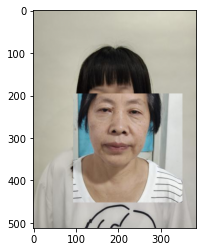

In [171]:
folder1 = np.random.choice(train_origin_folders)
folder2 = np.random.choice(train_origin_folders)

normal1 = glob(os.path.join(folder1, 'normal*'))[0]
normal2 = glob(os.path.join(folder2, 'normal*'))[0]

normal1 = cv2.imread(normal1)
normal2 = cv2.imread(normal2)

k = 256
h, w, _ = normal1.shape
# xs, ys = (w - k) // 2, (h - k) // 2
# xe, ye = (w + k) // 2, (h + k) // 2

xs, ys = np.random.randint(w - k), np.random.randint(h - k)
xe, ye = xs + k, ys + k

print(xs, ys)
# normal2_copy = normal2[:, :]
normal2[ys:ye, xs:xe] = normal1[ys:ye, xs:xe]
# normal1[ys:ye, xs:xe] = normal2_copy[ys:ye, xs:xe]
# normal2[0:k, 0:k] = normal1[0:k, 0:k]
# normal1[0:k, 0:k] = normal2_copy[0:k, 0:k]


normal2 = cv2.cvtColor(normal2, cv2.COLOR_BGR2RGB)
normal2 = normal2 / 255.
    
plt.imshow(normal2)
plt.show()

In [ ]:
import